# Control 1

## 1. Realice un análisis exploratorio de los datos *Prestigio de las Ocupaciones Canadienses*. ¿Hay algún o algunos detalles que le llamen la atención?

In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leer los datos del archivo `control1.dat` cuyas columnas están separadas por múltiples espacios.
df = pd.read_csv('control1.dat', sep='\s+')

Visualizar algunas entradas del conjunto de datos.

In [3]:
display(df)

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...,...
97,BUS.DRIVERS,7.58,5562,9.47,35.9,9171,bc
98,TAXI.DRIVERS,7.93,4224,3.59,25.1,9173,bc
99,LONGSHOREMEN,8.37,4753,0.00,26.1,9313,bc
100,TYPESETTERS,10.00,6462,13.58,42.2,9511,bc


In [4]:
# Reetiquetar las variables
df.columns = ["Ocupación", "Educación", "Ingreso", "Mujeres", "Prestigio", "Censo", "Tipo"]

Ver cuántos valores diferentes toma la variable `Ocupación`

In [5]:
print(len(df["Ocupación"].unique()))

102


Como el conjunto de datos tiene 102 entradas y como el arreglo `df["Ocupación"].unique()` tiene una longitud de 102 elementos, se concluye que no hay ocupaciones repetidas.

Ver cuántos valores diferentes toma la variable `Censo`

In [6]:
print(len(df["Censo"].unique()))

101


Buscar la entrada que se repite en la variable `Censo`

In [7]:
import collections
a = [item for item, count in collections.Counter(df["Censo"]).items() if count > 1]

print(df[df["Censo"].isin(a)])

         Ocupación  Educación  Ingreso  Mujeres  Prestigio  Censo Tipo
70  SLAUGHTERERS.1       7.64     5134    17.26       25.2   8215   bc
71  SLAUGHTERERS.2       7.64     5134    17.26       34.8   8215   bc


La variable `Censo` parece ser una variable para la identificación de las entradas en el censo sin un significado numérico verdadero. Hacer que la numeración de entradas del DataFrame tome los valores de la variable `Censo` y quitar esta última columna

In [8]:
df.index = df["Censo"]
df.drop(["Censo"], axis = 1, inplace = True)

Ver cuántos valores diferentes toma la variable `Tipo`

In [9]:
print(len(df["Tipo"].unique()))
print(df["Tipo"].unique())

4
['prof' 'bc' 'wc' nan]


Reetiquetar los tipos de ocupaciones

In [10]:
df.loc[df["Tipo"] == "prof", "Tipo"] = "Profesional, gerencial y técnico"
df.loc[df["Tipo"] == "bc", "Tipo"] = "Obrero"
df.loc[df["Tipo"] == "wc", "Tipo"] = "Oficinista"

Desplegar el porcentaje de valores nulos para cada variable del conjunto de datos

In [11]:
display(df.isnull().sum() / len(df))

Ocupación    0.000000
Educación    0.000000
Ingreso      0.000000
Mujeres      0.000000
Prestigio    0.000000
Tipo         0.039216
dtype: float64

El 3.9216 % de entradas en el juego de datos tiene un valor nulo en el campo `Tipo`

Imprimir las estadísticas principales de las variables numéricas.

In [12]:
display(df.describe())

,Educación,Ingreso,Mujeres,Prestigio
count,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333
std,2.728444,4245.922227,31.724931,17.204486
min,6.380000,611.000000,0.000000,14.800000
25%,8.445000,4106.000000,3.592500,35.225000
50%,10.540000,5930.500000,13.600000,43.600000
75%,12.647500,8187.250000,52.202500,59.275000
max,15.970000,25879.000000,97.510000,87.200000


In [13]:
df[df["Mujeres"]> 70].sort_values("Mujeres", ascending = False)

,Ocupación,Educación,Ingreso,Mujeres,Prestigio,Tipo
Censo,,,,,,
4111,SECRETARIES,11.59,4036,97.51,46.0,Oficinista
6147,BABYSITTERS,9.46,611,96.53,25.9,NaN
4175,TELEPHONE.OPERATORS,10.51,3161,96.14,38.1,Oficinista
3131,NURSES,12.46,4614,96.12,64.7,"Profesional, gerencial y técnico"
4113,TYPISTS,11.49,3148,95.97,41.9,Oficinista
4171,RECEPTIONSTS,11.04,2901,92.86,38.7,Oficinista
4133,TELLERS.CASHIERS,10.64,2448,91.76,42.3,Oficinista
8563,SEWING.MACH.OPERATORS,6.38,2847,90.67,28.2,Obrero
2731,PRIMARY.SCHOOL.TEACHERS,13.62,5648,83.78,59.6,"Profesional, gerencial y técnico"


Mapa de calor de la matriz de correlación obtenida a partir de los datos de las variables numéricas

<AxesSubplot:>

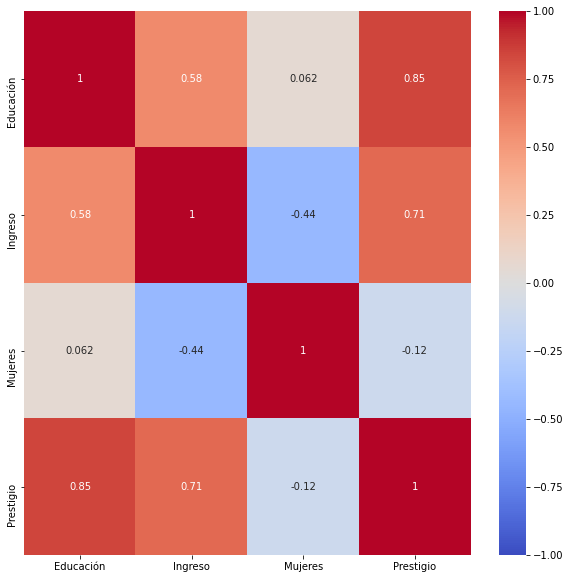

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

Correlación positiva eduación - todo
Correlación ingreso es positiva para todo menos para Mujeres :(
Correlación negativa mujeres - todo
Correlación prestigio es positiva para todo menos para Mujeres :(


Función para graficar histogramas o diagramas de dispersión (dependiendo de si `x_col` es igual a `y_col` o no) a partir de los datos del DataFrame `df`, separando los datos dependiendo de los valores que tome la variable `label`

In [15]:
def plot(df, x_col, y_col, label, targets, colors, size_col = None):
    def normalize(l):
        max_val = max(l)
        min_val = min(l)

        return [(x-min_val)/(max_val - min_val) for x in l]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel(x_col,fontsize=20)
    
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if x_col == y_col:
        ax.set_ylabel("Frecuencia", fontsize=20)
        ax.set_title("Histograma de " + x_col + " por tipo de ocupación",fontsize=20)
        
        kwargs = dict(alpha=0.6, bins=100)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            ax.hist(df.loc[indicesToKeep, x_col], color = color, alpha = 0.6, bins = 15)
    else:
        if size_col:
            size = 100 + np.dot(normalize(df[size_col]), 600)
            
        #print(size)
        ax.set_ylabel(y_col, fontsize=20)
        ax.set_title(y_col + " vs. " + x_col,fontsize=20)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            s = size[indicesToKeep] if size_col else 100
            ax.scatter(df.loc[indicesToKeep, x_col], 
                        df.loc[indicesToKeep, y_col], c = color, s = s, alpha = 0.6)

        #for i, txt in enumerate(df["Ocupación"]):
        #    plt.annotate(txt, (df.loc[i, x_col]-0.65, df.loc[i, y_col]-0.05), fontsize = 6)
    
    ax.legend(targets,prop={'size': 15})
    plt.show()

In [16]:
label = "Tipo"
targets = ["Profesional, gerencial y técnico", "Obrero", "Oficinista"]
colors = ["#000000", "#804e12", "#bababa"]
#colors = ["green", "red", "blue"]
columns = df.columns[range(1,len(df.columns)-1)]

## Educación

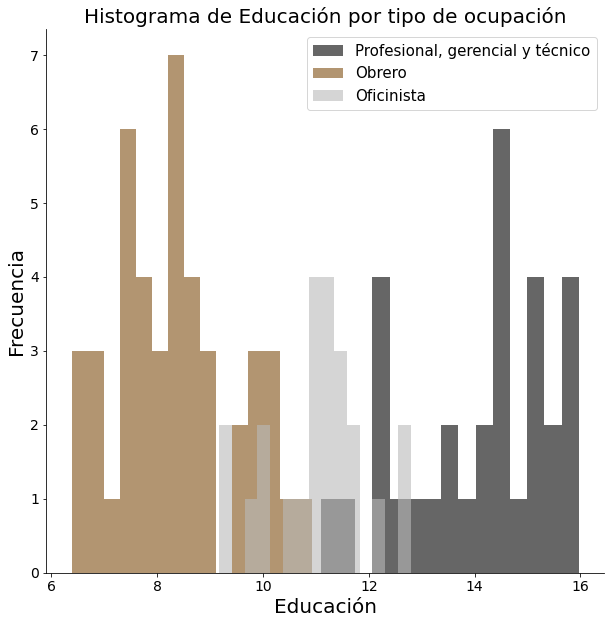

In [17]:
plot(df, "Educación", "Educación", label, targets, colors)

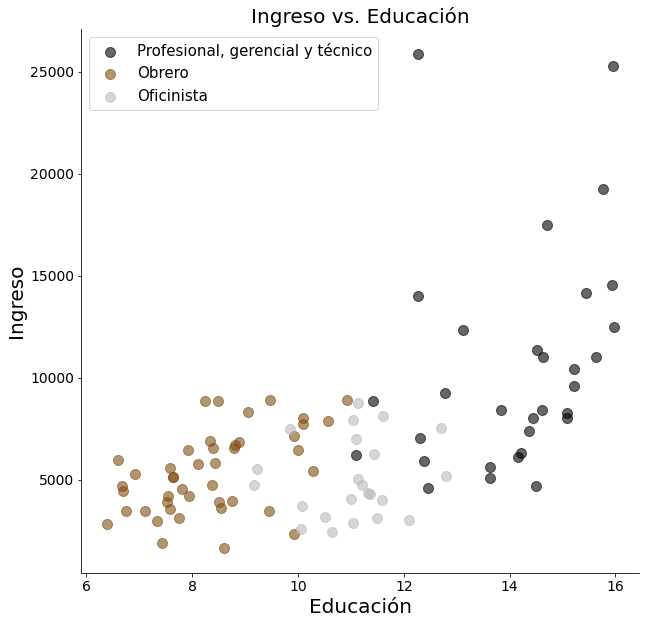

In [18]:
plot(df, "Educación", "Ingreso", label, targets, colors)

Relacionar con correlación de 0.58

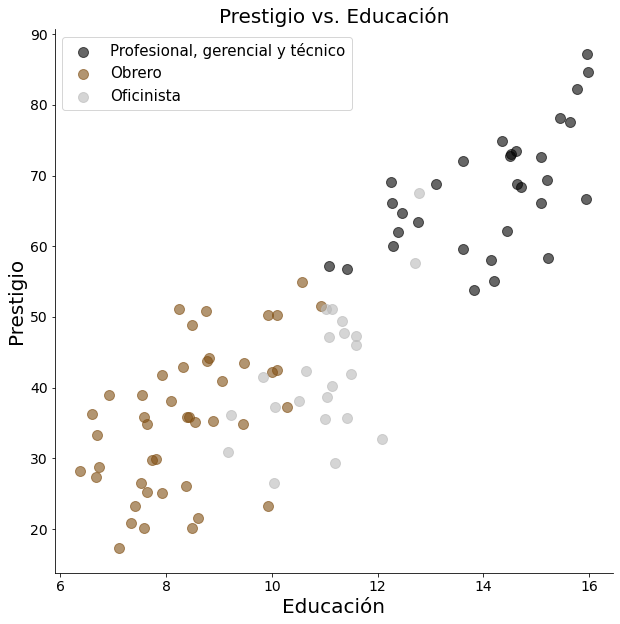

In [19]:
plot(df, "Educación", "Prestigio", label, targets, colors)

Esta es pregunta 3.

## Ingreso

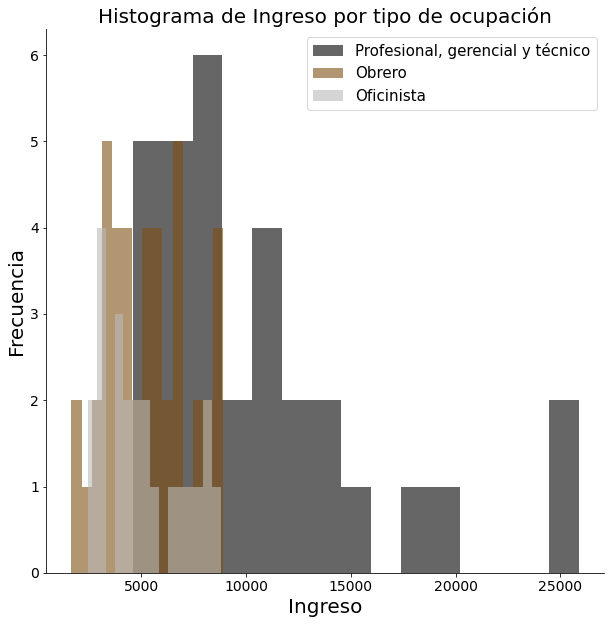

In [20]:
plot(df, "Ingreso", "Ingreso", label, targets, colors)

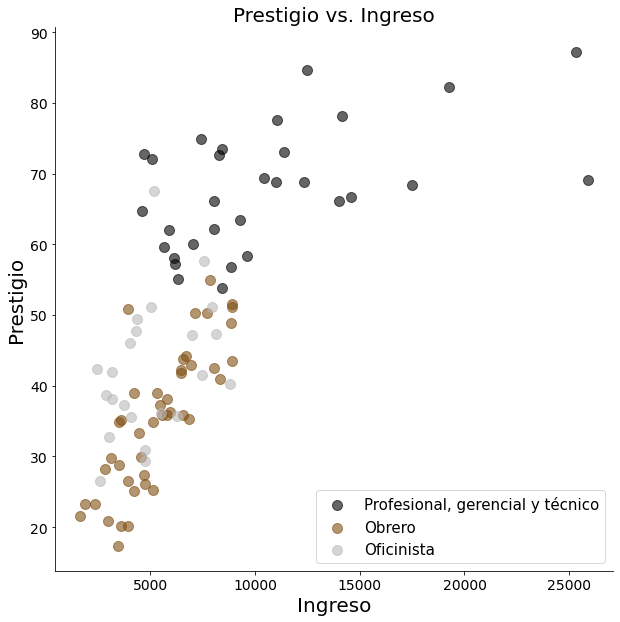

In [21]:
plot(df, "Ingreso", "Prestigio", label, targets, colors)

## Mujeres

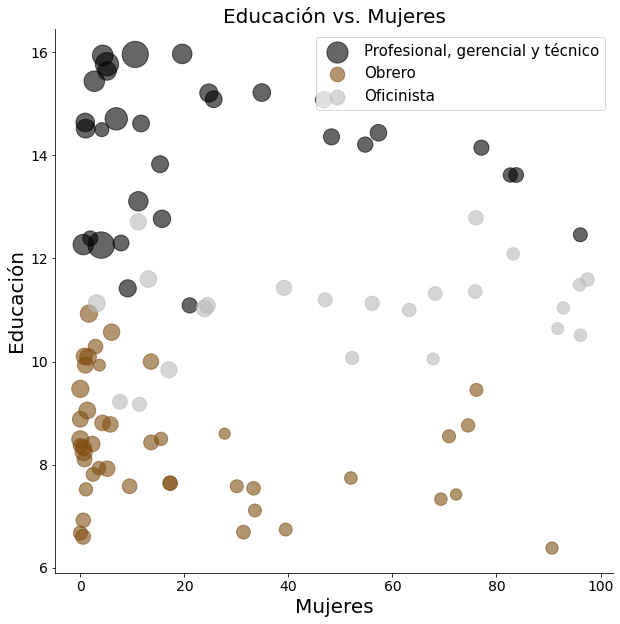

In [22]:
plot(df, "Mujeres", "Educación", label, targets, colors, size_col = "Ingreso")

Estaría interesante este mismo plot pero bolitas con tamaño Ingreso

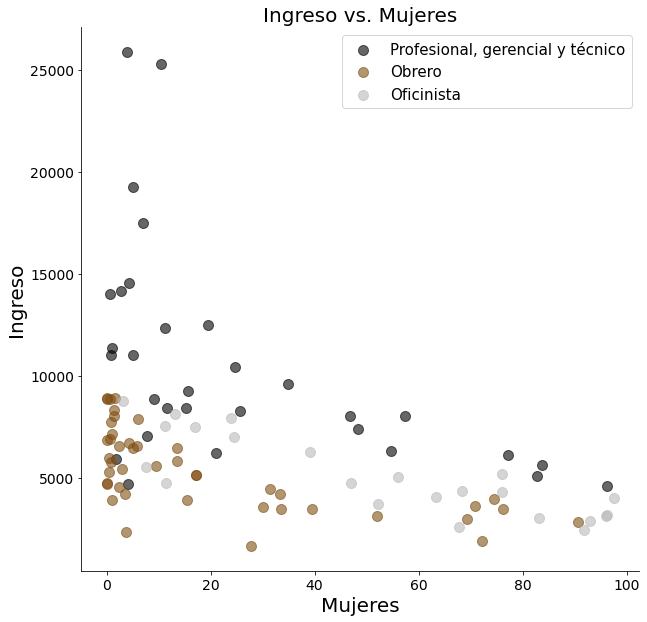

In [23]:
plot(df, "Mujeres", "Ingreso", label, targets, colors)

Las Mujeres se concentran en las ocupaciones de menor Ingreso

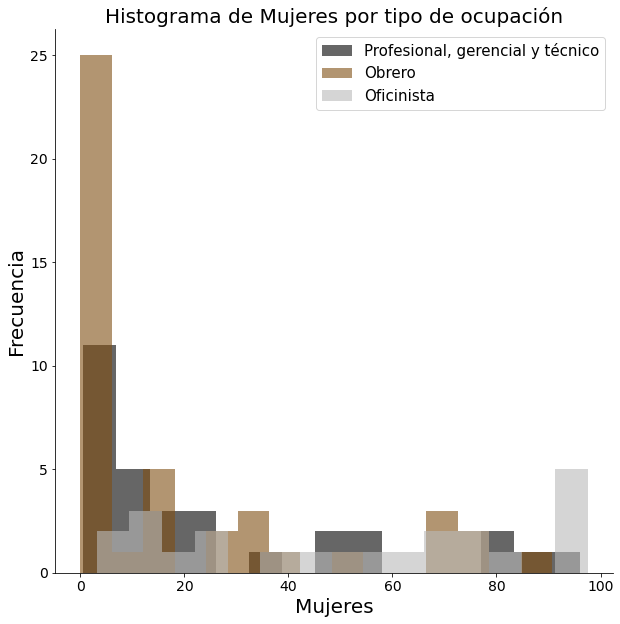

In [24]:
plot(df, "Mujeres", "Mujeres", label, targets, colors)

## Prestigio

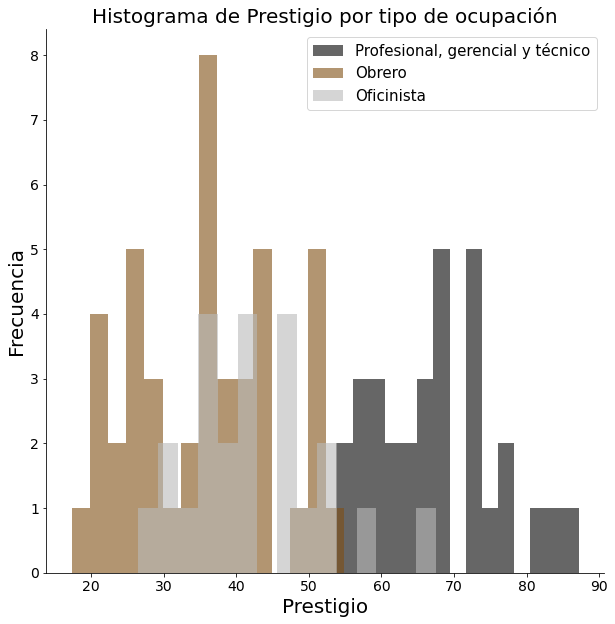

In [25]:
plot(df, "Prestigio", "Prestigio", label, targets, colors)

## Clasifique las variables en cuantitativas o cualitativas (a su vez, en discretas o continuas).

## ¿Identifica alguna relación entre prestigio y el nivel educativo?